# Aggregating Data with Group by

In this session we will explore data aggregation using pandas.  Aggregation means splitting a dataset up into parts and applying mathematical or other functions to those groups of data.

By the end you will be able to create a monthly time-series showing numbers of referrals, separated by priority level.

## Theory 

You may have come across the concept of data aggregation in a SQL course, and the principle is exactly the same here.

The 'group by' operation splits the data into groups based on entries in one or more columns, so that operations or calculations can be performed on subgroups of the data.

For example, say we wanted to calculate the total number of referrals made in each CCG for some time period. Our dataset looks like this:

| ccg_code | specialty | priority | referrals |
| --- | --- | --- | --- | 
| 00L | Cardiology | Routine | 200 |
| 00L | Urology | Routine | 600 |
| 99C | Cardiology | Urgent | 100 |
| 00L | 2WW | 2 Week Wait | 400 |
| 99C | Neurology | Routine | 900 |

The data contains more information than we need, because we are not interested in the specialty or priority. In which case we want to sum referrals **for each CCG**, summing over the values in other columns. In other words, we want to *group by* CCG and calculate the sum:

| ccg_code | referrals |
| --- | --- | 
| 00L | 1,200 |
| 99C | 1,000 |

## Sections

* [Group by a single column](#item1)
* [Group by multiple columns](#item2)
* [Group by units of time](#item3)
---

In [1]:
# Importing Python packages we are likely to need
import pandas as pd  # useful for reading and manipulating data tables
import matplotlib.pyplot as plt  # useful for plotting data

In [2]:
# We assume input and output data are in your machine's Downloads folder
input_data_path = "~/Downloads/referrals_oct19_dec20.csv"
output_data_path = "~/Downloads/referrals_by_priority.csv"

### Load the data

* Use `pd.read_csv` to read in the data. 
* Then use `pd.to_datetime` to convert the `week_start` column to datetime format, e.g.

```python
df['my_date_column'] = pd.to_datetime(df['my_date_column'])
```

In [3]:
df = pd.read_csv(input_data_path)
df['week_start'] = pd.to_datetime(df['week_start'])
df

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


---
<a name="item1">
<h2>Group by a single column</h2>
</a>

First, we'll take a subset of the data which will be easier to work with. Select rows where `Specialty` column has value `'2WW'` (two week wait cancer referrals).
* Use `==` to make a selection mask
* Use `df.loc` to select rows where the mask values are `True`

```python
smaller_df = df.loc[df['column'] == 'value', :]
```

In [4]:
df_2ww = df.loc[df['specialty'] == '2WW', :]
df_2ww

,week_start,ccg_code,specialty,priority,referrals
2,2019-10-07,00L,2WW,2 Week Wait,349
61,2019-10-07,00N,2WW,2 Week Wait,180
113,2019-10-07,00P,2WW,2 Week Wait,284
169,2019-10-07,00Q,2WW,2 Week Wait,122
226,2019-10-07,00R,2WW,2 Week Wait,170
...,...,...,...,...,...
592413,2020-12-21,99C,2WW,2 Week Wait,151
592463,2020-12-21,99E,2WW,2 Week Wait,208
592520,2020-12-21,99F,2WW,2 Week Wait,127
592574,2020-12-21,99G,2WW,2 Week Wait,113


### Sum 2WW referrals, aggregated by CCG
* Use `df.groupby('ccg_code')`
* Select the `referrals` column
* Use the `sum` method

```python
gb = df.groupby('aggregation_column')
summed_values = gb['value_column'].sum()
```

The result of the aggregation operation (i.e. the sum) is a pandas `Series` object. The series index comprises the CCG codes and the values are the summed referrals.

In [5]:
gb_ccg = df_2ww.groupby('ccg_code')
ref_per_ccg = gb_ccg['referrals'].sum()
ref_per_ccg

ccg_code
00L    18486
00N     7922
00P    14929
00Q     6695
00R     8156
       ...  
99C    11883
99E    15970
99F     9710
99G     9545
99M     9173
Name: referrals, Length: 135, dtype: int64

### Visualise aggregation result
Numbers are great, but we like pictures better. Let's visualise the referrals in each CCG with a bar chart. Use your aggregation result from above and `matplotlib`. 

```python
fig, ax = plt.subplots()
ax.bar(df.index, df.values)
```

<BarContainer object of 135 artists>

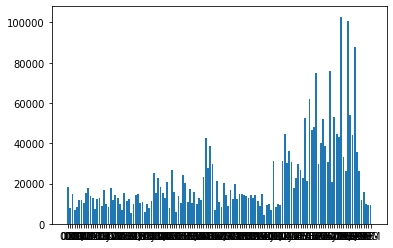

In [6]:
fig, ax = plt.subplots()
ax.bar(ref_per_ccg.index, ref_per_ccg.values)

### Take the average weekly referrals, for each CCG
Sum is not the only aggregation function you can use. Let's try the same `groupby` result you made previously, but this time use `mean` instead of `sum`.

```python
avg_values = gb['value_column'].mean()
```

In [7]:
mean_weekly_refs_per_ccg = gb_ccg['referrals'].mean()
mean_weekly_refs_per_ccg

ccg_code
00L    280.090909
00N    113.171429
00P    229.676923
00Q    101.439394
00R    127.437500
          ...    
99C    177.358209
99E    241.969697
99F    149.384615
99G    144.621212
99M    131.042857
Name: referrals, Length: 135, dtype: float64

### Other useful aggregate functions
* `count`
* `median`
* `std` (standard deviation)
* `sem` (standard error of the mean)
* `min` and `max`

You could also define your own aggregate functions. This flexibility is can be extremely powerful.


---
<a name="item2"><h2>
Group by multiple columns
</h2></a>

It's possible to group by multiple columns at once. This means you apply the aggregation function to each subset of values in the columns you group by. For example, if you group by `CCG` and `priority` then use the `sum` function, you will get the total number of referrals per CCG *and* per priority level.

```python
gb_multi_cols = df.groupby(['column_1', 'column_2'])
summed_values = gb_multi_cols['value_colum'].sum()
```
The result is still a pandas `Series` object, but this time the index has two 'levels', one for each aggregation column.

Let's group by both `specialty` and `priority`, then take the sum.

In [8]:
gb_ccg_priority = df.groupby(['specialty', 'priority'])
ref_per_priority_per_ccg = gb_ccg_priority.sum()
ref_per_priority_per_ccg

referrals
specialty          priority              
(blank)            2 Week Wait        438
                   Routine          81278
                   Urgent           13202
2WW                2 Week Wait    2924070
                   Routine           2281
...                                   ...
Surgery - Vascular Routine         126613
                   Urgent           36828
Urology            2 Week Wait        158
                   Routine         417394
                   Urgent           86950

[146 rows x 1 columns]

---
<a name="item3"><h2>Group by units of time</h1></a>

You can group by `datetime` values, just like anything else. But sometimes the units of time might be too granular to be useful, e.g. your `datetime` values may be expressed at the level of minutes or seconds, but if your data span a year then you probably don't want to show each individual data point.

Pandas has a special date `Grouper` object, which you provide to `df.groupby`. Its `key` argument lets you specify the column you want to group by and the `freq` argument specifies the desired frequency, where
* `D` means daily
* `W` means weekly
* `M` means monthly

The full list of frequency options can be found <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases">here</a>.

```python
gb_multi_cols = df.groupby(['column_1', 'column_2'])
summed_values = gb_multi_cols['value_colum'].sum()
```

Find the total number of referrals by month and then plot the resulting time series, then plot with `df.plot()`. What happened in March 2020?

In [9]:
gb_monthly = df.groupby(pd.Grouper(key='week_start', freq='M'))
ref_monthly = gb_monthly['referrals'].sum()
ref_monthly

week_start
2019-10-31    1435744
2019-11-30    1407937
2019-12-31    1383517
2020-01-31    1448056
2020-02-29    1442748
2020-03-31    1152563
2020-04-30     267082
2020-05-31     478250
2020-06-30     959430
2020-07-31     963644
2020-08-31    1245864
2020-09-30    1128657
2020-10-31    1149103
2020-11-30    1399462
2020-12-31     756241
Freq: M, Name: referrals, dtype: int64

<AxesSubplot:xlabel='week_start'>

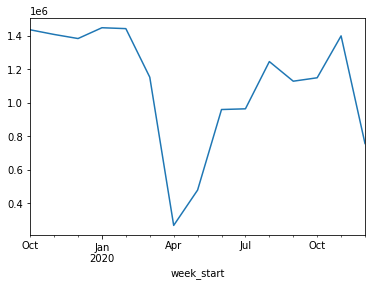

In [10]:
ref_monthly.plot()

### Unstacking

We saw above that grouping by multiple columns at once gives us a pandas `Series` object with two index 'levels'. But it is easier to handle the data if one of these levels can be switched around and transformed into multiple *columns* instead. In pandas this is called an `unstack` operation, by analogy with taking a stack of books (like horizontal rows) and rotating them to place on a shelf (like vertical columns).

```python
gb_multi_cols = df.groupby(['column_1', 'column_2'])
summed_values_stacked = gb_multi_cols['value_colum'].sum()
summed_values_unstacked_c1 = summed_values_stacked.unstack('column_1')
```
For example, let's say our dataframe looked like this and then we used `groupby` with `sum`:

In [11]:
# define example data
example_data = {
    "ccg_code": ["00L", "00L", "99C", "00L", "99C"],
    "priority": ["Routine", "Routine", "Urgent", "2 Week Wait", "Routine"],
    "referrals": ["2", "6", "1", "4", "9"]
}
example = pd.DataFrame(example_data)
example

,ccg_code,priority,referrals
0,00L,Routine,2
1,00L,Routine,6
2,99C,Urgent,1
3,00L,2 Week Wait,4
4,99C,Routine,9


In [12]:
# aggregate example data
gb_example_stacked = example.groupby(['ccg_code', 'priority']).sum()
gb_example_stacked

referrals
ccg_code priority             
00L      2 Week Wait         4
         Routine            26
99C      Routine             9
         Urgent              1

We can make the `priority` level into columns, like this:

In [13]:
gb_example_stacked.unstack('priority')

referrals               
priority 2 Week Wait Routine Urgent
ccg_code                           
00L                4      26    NaN
99C              NaN       9      1

Notice there's missing data (`NaN`) for some elements, since those combinations weren't present in the original data.

Now let's group by both month and priority and take the total number of referrals for each, then unstack the priority level, so that months are rows and priorities are columns. This will allow us to plot the time series for each priority simultaneously.

E.g. result of the following will have rows for each date and columns for each value of `other_column`:

```python
gb_date_and_col = df.groupby([pd.Grouper(key='date_column', freq='M'), 'other_column'])
agg_df = gb_monthly_priority['value'].sum()
unstacked = agg_df.unstack('other_column')
```

Then we can plot these all together with `unstacked.plot()`.

In [14]:
gb_monthly_priority = df.groupby([pd.Grouper(key='week_start', freq='M'), 'priority'])
ref_monthly_priority = gb_monthly_priority['referrals'].sum()
ref_monthly_priority

ref_monthly_priority_unstack = ref_monthly_priority.unstack('priority')
ref_monthly_priority_unstack

priority,2 Week Wait,Routine,Urgent
week_start,,,
2019-10-31,217570,1050288,167886
2019-11-30,215739,1023472,168726
2019-12-31,209806,1009113,164598
2020-01-31,222783,1051599,173674
2020-02-29,216335,1056462,169951
2020-03-31,182577,834949,135037
2020-04-30,89746,128381,48955
2020-05-31,132658,261508,84084
2020-06-30,217268,586936,155226


<AxesSubplot:xlabel='week_start'>

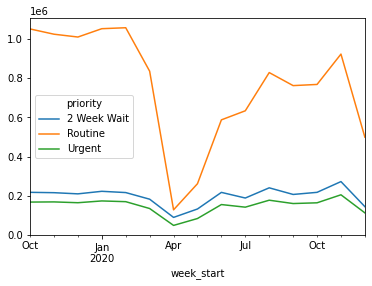

In [15]:
ref_monthly_priority_unstack.plot()

Finally, save your output time series using the `output_data_path` defined above.

```python
timeseries_df.to_csv(output_data_path)
```

In [ ]:
ref_monthly_priority_unstack.to_csv(output_data_path)

### Exercise

The client has come back and said the meant for each **specialty**, not each priority! Also they want the time points to be the **start of each quarter**, rather than monthly.

Hint: you can find the reference list of time point aggregations here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [21]:
new_gb = df.groupby([pd.Grouper(key='week_start', freq='QS'), 'specialty'])
new_sum = new_gb['referrals'].sum()

new_sum_unstack = new_sum.unstack('specialty')
new_sum_unstack

specialty,(blank),2WW,Allergy,Cardiology,Children's & Adolescent Services,Community Healthcare,Complementary Medicine,Dentistry and Orthodontics,Dermatology,Diabetic Medicine,...,Rheumatology,Sleep Medicine,Speech and Language Therapy,Sports and Exercise Medicine,Surgery - Breast,Surgery - Cardiothoracic,Surgery - Not Otherwise Specified,Surgery - Plastic,Surgery - Vascular,Urology
week_start,,,,,,,,,,,,,,,,,,,,,
2019-10-01,29346.0,631933.0,14457.0,184087.0,269589.0,1209.0,196.0,407.0,209036.0,27146.0,...,91685.0,23896.0,1222.0,634.0,31572.0,500.0,70514.0,18123.0,42499.0,133388.0
2020-01-01,26406.0,610649.0,13845.0,175621.0,269518.0,1743.0,182.0,353.0,195480.0,27666.0,...,86499.0,25960.0,1207.0,529.0,29192.0,502.0,63967.0,17145.0,41047.0,126660.0
2020-04-01,8119.0,433238.0,4977.0,77820.0,99957.0,478.0,59.0,138.0,76344.0,11369.0,...,39394.0,7234.0,859.0,154.0,14916.0,239.0,24740.0,5759.0,17067.0,50245.0
2020-07-01,16072.0,627069.0,10892.0,128176.0,194922.0,1505.0,133.0,337.0,162879.0,19610.0,...,71243.0,15427.0,1213.0,353.0,24329.0,407.0,51928.0,13212.0,33153.0,95954.0
2020-10-01,14975.0,624608.0,10028.0,134641.0,205604.0,2294.0,115.0,292.0,146889.0,20951.0,...,72032.0,15205.0,1141.0,292.0,28673.0,448.0,48596.0,11761.0,29675.0,98255.0


<AxesSubplot:xlabel='week_start'>

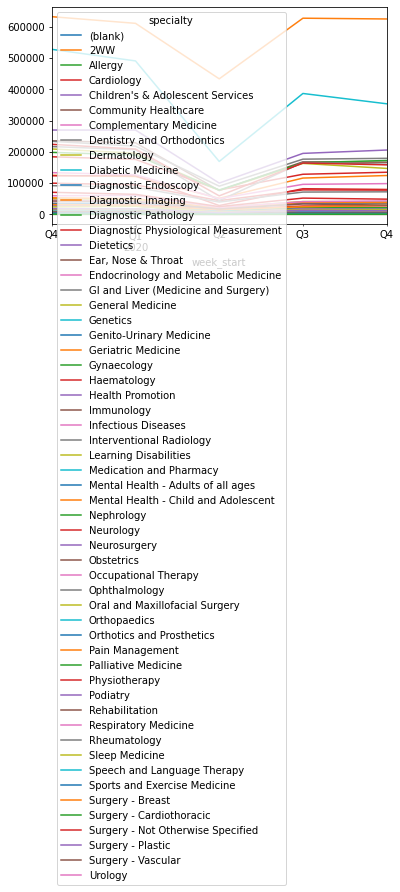

In [22]:
new_sum_unstack.plot()